In [19]:
import scanpy as sc
import omicverse as ov
from omicverse.externel import VIA

import matplotlib.pyplot as plt
ov.plot_set()

Dependency error: The 'bioservices' distribution was not found and is required by the application


In [20]:
 adata = sc.read_h5ad('/media/zhy/zhyfile/1111/121_epi_scvi.h5ad')

In [21]:
adata

AnnData object with n_obs × n_vars = 15235 × 25627
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'batch', '_scvi_batch', '_scvi_labels', 'leiden_scVI1', 'celltype.main'
    var: 'gene'
    obsm: 'X_scVI', 'X_umap'

In [4]:
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=2000,)
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]
ov.pp.scale(adata)
ov.pp.pca(adata,layer='scaled',n_pcs=50)

Begin robust gene identification
After filtration, 25627/25627 genes are kept.     Among 25627 genes, 25627 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
['Hbb-b1', 'Hba-a2', 'Mt-atp6']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 18.955697298049927 seconds.
End of size normalization: shiftlog and HVGs selection pearson
computing PCA
    with n_comps=50
    finished (0:00:03)


In [5]:
adata

AnnData object with n_obs × n_vars = 15235 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'batch', '_scvi_batch', '_scvi_labels', 'leiden_scVI1', 'celltype.main'
    var: 'gene', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues'
    obsm: 'X_scVI', 'X_umap', 'X_pca', 'scaled|original|X_pca'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'

In [22]:
ncomps=10
knn=15
v0_random_seed=4
root_user = ['Areg+_Epi'] #the index of a cell belonging to the nIPC cell type
memory = 50
dataset = ''
use_rep = 'X_scVI'
clusters = 'celltype.main'
basis='X_umap'

'''
#NOTE1, if you decide to choose a cell type as a root, then you need to set the dataset as 'group'
#root_user=['HSC1']
#dataset = 'group'# 'humanCD34'
#NOTE2, if rna-velocity is available, considering using it to compute the root automatically- see RNA velocity tutorial
'''

v0 = VIA.core.VIA(data=adata.obsm[use_rep][:, 0:ncomps],
             true_label=adata.obs[clusters],
             edgepruning_clustering_resolution=0.15, cluster_graph_pruning=0.15,
             knn=knn,  root_user=root_user, resolution_parameter=1.5,
             dataset=dataset, random_seed=v0_random_seed, memory=memory)#, do_compute_embedding=True, embedding_type='via-atlas')

v0.run_VIA()

2025-01-21 17:26:04.195117	Running VIA over input data of 15235 (samples) x 10 (features)
2025-01-21 17:26:04.195209	Knngraph has 15 neighbors
2025-01-21 17:26:06.804226	Finished global pruning of 15-knn graph used for clustering at level of 0.15. Kept 48.0 % of edges. 
2025-01-21 17:26:06.870353	Number of connected components used for clustergraph  is 2
2025-01-21 17:26:07.196927	Commencing community detection
2025-01-21 17:26:08.178949	Finished community detection. Found 316 clusters.
2025-01-21 17:26:08.184873	Merging 265 very small clusters (<10)
2025-01-21 17:26:08.189815	Finished detecting communities. Found 51 communities
2025-01-21 17:26:08.191174	Making cluster graph. Global cluster graph pruning level: 0.15
2025-01-21 17:26:08.213215	Graph has 2 connected components before pruning
2025-01-21 17:26:08.216088	Graph has 4 connected components after pruning
2025-01-21 17:26:08.217770	Graph has 2 connected components after reconnecting
handling intersection condition where a singl

  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
2025-01-21 17:26:20.528276	Identifying terminal clusters corresponding to unique lineages...
2025-01-21 17:26:20.528302	Closeness:[1, 6, 9, 10, 16, 18, 20, 22, 29, 31, 33, 38, 42, 44, 45]
2025-01-21 17:26:20.528315	Betweenness:[1, 4, 6, 7, 8, 9, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 31, 32, 33, 36, 38, 39, 42, 43, 44, 45, 46, 47]
2025-01-21 17:26:20.528325	Out Degree:[1, 6, 9, 10, 11, 16, 18, 20, 22, 26, 27, 29, 31, 33, 34, 35, 36, 38, 42, 43, 44, 45, 46]
2025-01-21 17:26:20.528519	Cluster 6 had 3 or more neighboring terminal states [10, 18, 44] and so we removed cluster 18
2025-01-21 17:26:20.528578	Cluster 43 had 3 or more neighboring terminal states [1, 26, 27] and so we removed cluster 43
2025-01-21 17:26:20.528795	Terminal clusters corresponding to unique lineages in this component are [1, 33, 6, 9, 10, 42, 44, 46, 16, 20, 22, 26, 27] 
2025-01-21 17:26:20.528819	Calculating lineage probability at memory 50


  0%|          | 0/1000 [00:00<?, ?it/s]

2025-01-21 17:26:23.691359	Cluster or terminal cell fate 1 is reached 68.0 times
2025-01-21 17:26:23.768455	Cluster or terminal cell fate 33 is reached 18.0 times
2025-01-21 17:26:23.839494	Cluster or terminal cell fate 6 is reached 289.0 times
2025-01-21 17:26:23.907159	Cluster or terminal cell fate 9 is reached 469.0 times
2025-01-21 17:26:23.980650	Cluster or terminal cell fate 10 is reached 177.0 times
2025-01-21 17:26:24.057641	42 cluster/state is never reached. try increase number of KNN (which will increase number of edges) or try to increase the value of jac_std_global and cluster_graph_pruning which will lower edge pruning
2025-01-21 17:26:24.128502	Cluster or terminal cell fate 44 is reached 286.0 times
2025-01-21 17:26:24.195948	Cluster or terminal cell fate 46 is reached 457.0 times
2025-01-21 17:26:24.272630	Cluster or terminal cell fate 16 is reached 18.0 times
2025-01-21 17:26:24.344601	Cluster or terminal cell fate 20 is reached 275.0 times
2025-01-21 17:26:24.421132	Cl

UnboundLocalError: local variable 'x' referenced before assignment

In [13]:
import scvelo as scv
adata=scv.datasets.dentategyrus()
adata

try downloading from url
https://github.com/theislab/scvelo_notebooks/raw/master/data/DentateGyrus/10X43_1.h5ad
... this may take a while but only happens once


  0%|          | 0.00/23.7M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [14]:
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=2000,)
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]
ov.pp.scale(adata)
ov.pp.pca(adata,layer='scaled',n_pcs=50)

Begin robust gene identification
After filtration, 13264/13913 genes are kept.     Among 13264 genes, 13189 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
['Hba-a1', 'Malat1', 'Ptgds', 'Hbb-bt']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 3.624751329421997 seconds.
End of size normalization: shiftlog and HVGs selection pearson
... as `zero_center=True`, sparse input is densified and may lead to large

In [15]:
ov.pp.neighbors(adata,use_rep='scaled|original|X_pca',n_neighbors=15,n_pcs=30)
ov.pp.umap(adata,min_dist=1)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:04)


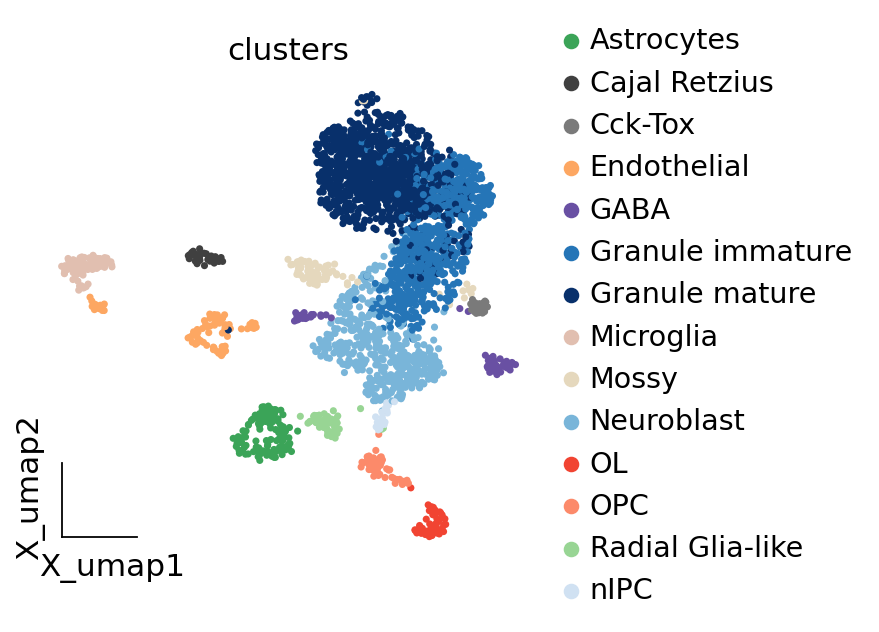

In [16]:
ov.pl.embedding(adata,basis='X_umap',
                   color=['clusters'],
                   frameon='small',cmap='Reds')

In [17]:
ncomps=30
knn=15
v0_random_seed=4
root_user = ['nIPC'] #the index of a cell belonging to the nIPC cell type
memory = 10
dataset = ''
use_rep = 'scaled|original|X_pca'
clusters = 'clusters'
basis='X_umap'

'''
#NOTE1, if you decide to choose a cell type as a root, then you need to set the dataset as 'group'
#root_user=['HSC1']
#dataset = 'group'# 'humanCD34'
#NOTE2, if rna-velocity is available, considering using it to compute the root automatically- see RNA velocity tutorial
'''

v0 = VIA.core.VIA(data=adata.obsm[use_rep][:, 0:ncomps],
             true_label=adata.obs[clusters],
             edgepruning_clustering_resolution=0.15, cluster_graph_pruning=0.15,
             knn=knn,  root_user=root_user, resolution_parameter=1.5,
             dataset=dataset, random_seed=v0_random_seed, memory=memory)#, do_compute_embedding=True, embedding_type='via-atlas')

v0.run_VIA()

2025-01-21 17:01:19.804789	Running VIA over input data of 2930 (samples) x 30 (features)
2025-01-21 17:01:19.804877	Knngraph has 15 neighbors
2025-01-21 17:01:20.921978	Finished global pruning of 15-knn graph used for clustering at level of 0.15. Kept 43.8 % of edges. 
2025-01-21 17:01:20.936224	Number of connected components used for clustergraph  is 1
2025-01-21 17:01:20.991649	Commencing community detection
2025-01-21 17:01:21.167166	Finished community detection. Found 537 clusters.
2025-01-21 17:01:21.168616	Merging 496 very small clusters (<10)
2025-01-21 17:01:21.175318	Finished detecting communities. Found 41 communities
2025-01-21 17:01:21.175603	Making cluster graph. Global cluster graph pruning level: 0.15
2025-01-21 17:01:21.181543	Graph has 1 connected components before pruning
2025-01-21 17:01:21.183905	Graph has 14 connected components after pruning
2025-01-21 17:01:21.192802	Graph has 1 connected components after reconnecting
2025-01-21 17:01:21.193330	0.0% links trimmed

  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
2025-01-21 17:01:34.500816	Identifying terminal clusters corresponding to unique lineages...
2025-01-21 17:01:34.500845	Closeness:[8, 10, 11, 15, 16, 19, 20, 21, 25, 28, 31, 36, 38, 40]
2025-01-21 17:01:34.500856	Betweenness:[2, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 17, 19, 20, 22, 25, 28, 30, 31, 34, 35, 36, 38]
2025-01-21 17:01:34.500864	Out Degree:[4, 5, 7, 8, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 22, 24, 25, 26, 28, 30, 31, 34, 36, 38, 40]
2025-01-21 17:01:34.501041	Cluster 4 had 3 or more neighboring terminal states [14, 22, 34] and so we removed cluster 14
2025-01-21 17:01:34.501281	Terminal clusters corresponding to unique lineages in this component are [34, 4, 5, 36, 7, 8, 38, 11, 12, 19, 22, 25, 28, 30, 31] 
2025-01-21 17:01:34.501306	Calculating lineage probability at memory 10


  0%|          | 0/1000 [00:00<?, ?it/s]

2025-01-21 17:01:37.187529	Cluster or terminal cell fate 34 is reached 200.0 times
2025-01-21 17:01:37.250599	Cluster or terminal cell fate 4 is reached 230.0 times
2025-01-21 17:01:37.315049	Cluster or terminal cell fate 5 is reached 85.0 times
2025-01-21 17:01:37.380417	Cluster or terminal cell fate 36 is reached 4.0 times
2025-01-21 17:01:37.420119	Cluster or terminal cell fate 7 is reached 835.0 times
2025-01-21 17:01:37.486251	Cluster or terminal cell fate 8 is reached 4.0 times
2025-01-21 17:01:37.552025	Cluster or terminal cell fate 38 is reached 5.0 times
2025-01-21 17:01:37.617243	Cluster or terminal cell fate 11 is reached 56.0 times
2025-01-21 17:01:37.678249	Cluster or terminal cell fate 12 is reached 438.0 times
2025-01-21 17:01:37.743556	Cluster or terminal cell fate 19 is reached 5.0 times
2025-01-21 17:01:37.805415	Cluster or terminal cell fate 22 is reached 221.0 times
2025-01-21 17:01:37.870110	Cluster or terminal cell fate 25 is reached 39.0 times
2025-01-21 17:01:37